## Numerical lookup table for Gaussian sigma from Rician MAD
Mike Tyszka | CBIC | 2025-12-18

In [138]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

In [118]:
# Create a complex-valued image array with normally distributed real and imaginary noise and a signal offset
n = 1000  # Size of the image array

# Standard deviation of the Gaussian noise
# For noise sigma = 1 the signal intensity and SNR are identical
sigma = 1.0

# Signal levels to simulate varying SNR
n_signal = 50
signal_max = 5.0
signal_levels = np.linspace(0.0, signal_max, n_signal)

# Array to hold the MAD of the residual noise for each SNR level
residual_mad = np.zeros(n_signal)

# Loop over different signal intensities to simulate varying SNR levels
for ic, signal in enumerate(signal_levels):
   
    # Complex offset Gaussian noise with sigma = 1 and offset = signal
    z_noise = np.random.normal(0, sigma, (n, n)) + 1j * np.random.normal(0, sigma, (n, n)) + signal

    # Calculate the magnitude of the complex-valued array
    # This represents the Rician distributed MRI magnitude signal
    mri_magnitude = np.abs(z_noise)

    # Residual noise following subtraction the base signal
    residual = mri_magnitude - signal

    # Calculate MAD of residual for this signal level
    # Assume median is identical to signal for ideal case
    residual_mad[ic] = np.median(np.abs(residual))

    print(f"Signal: {signal:.2f}  MAD(residual): {residual_mad[ic]:.4f}")

Signal: 0.00  MAD(residual): 1.1774
Signal: 0.10  MAD(residual): 1.0785
Signal: 0.20  MAD(residual): 0.9839
Signal: 0.31  MAD(residual): 0.8989
Signal: 0.41  MAD(residual): 0.8176
Signal: 0.51  MAD(residual): 0.7427
Signal: 0.61  MAD(residual): 0.6766
Signal: 0.71  MAD(residual): 0.6213
Signal: 0.82  MAD(residual): 0.5942
Signal: 0.92  MAD(residual): 0.5831
Signal: 1.02  MAD(residual): 0.5844
Signal: 1.12  MAD(residual): 0.5881
Signal: 1.22  MAD(residual): 0.5947
Signal: 1.33  MAD(residual): 0.6046
Signal: 1.43  MAD(residual): 0.6139
Signal: 1.53  MAD(residual): 0.6218
Signal: 1.63  MAD(residual): 0.6306
Signal: 1.73  MAD(residual): 0.6370
Signal: 1.84  MAD(residual): 0.6423
Signal: 1.94  MAD(residual): 0.6453
Signal: 2.04  MAD(residual): 0.6493
Signal: 2.14  MAD(residual): 0.6523
Signal: 2.24  MAD(residual): 0.6552
Signal: 2.35  MAD(residual): 0.6577
Signal: 2.45  MAD(residual): 0.6606
Signal: 2.55  MAD(residual): 0.6600
Signal: 2.65  MAD(residual): 0.6623
Signal: 2.76  MAD(residual):

Rayleigh distribution MAD/sigma factor: 1.1774
Gaussian distribution MAD/sigma factor: 0.6745


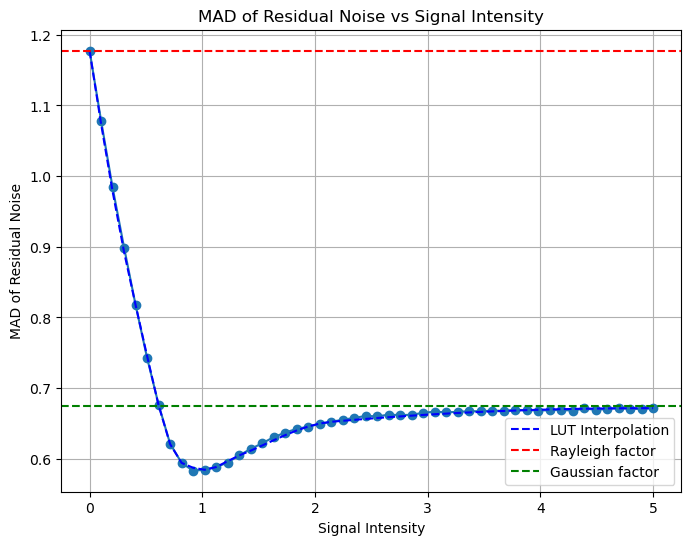

In [163]:
# For sigma = k MAD, k has analytical values for Rayleigh and Gaussian distributions
# k for Rayleigh distribution
f_rayleigh = float(np.sqrt(2 * np.log(2)))
print(f"Rayleigh distribution MAD/sigma factor: {f_rayleigh:.4f}")

# k for Gaussian distribution (quantile function for normal distribution at 75th percentile)
f_gauss = 0.6745
print(f"Gaussian distribution MAD/sigma factor: {f_gauss:.4f}")

# Select a subset of points for spline interpolation
idx_sub = [0, 4, 8, 10, 13, 21, 49]
x_sub = signal_levels[idx_sub]
y_sub = residual_mad[idx_sub]

# Interpolate back to the original signal levels
f_interp = PchipInterpolator(x_sub, y_sub)
y_interp = f_interp(signal_levels)

# Plot the results with Rician model and reference lines
plt.figure(figsize=(8, 6))
plt.plot(signal_levels, residual_mad, marker='o')
plt.plot(signal_levels, y_interp, 'b--', label='LUT Interpolation')
plt.axhline(y=f_rayleigh, color='r', linestyle='--', label='Rayleigh factor')
plt.axhline(y=f_gauss, color='g', linestyle='--', label='Gaussian factor')
plt.legend()
plt.title('MAD of Residual Noise vs Signal Intensity')
plt.xlabel('Signal Intensity')
plt.ylabel('MAD of Residual Noise')
plt.grid()
plt.show()


In [166]:
# Print the lookup table values for PCHIP interpolation
print("PCHIP Interpolation Lookup Table:")
print("Signal Levels:", x_sub)
print("MAD Values:", y_sub)

PCHIP Interpolation Lookup Table:
Signal Levels: [0.         0.40816327 0.81632653 1.02040816 1.32653061 2.14285714
 5.        ]
MAD Values: [1.17743669 0.81755008 0.59415234 0.58440642 0.60464279 0.65227609
 0.6716113 ]
